# Nonlinear Transformation of a Gaussian

Suppose that $\pmb{x} \sim N(\pmb{x_0}, P_x)$ is a Gaussian random variable with mean $\pmb{x_0}$ and covariance matrix $P_x$. If $\mathcal{F} : \mathbb{R}^n \to \mathbb{R}^m$ is a nonlinear function, we would like to approximate the statistics of the non-Gaussian random variable
\begin{equation}
\pmb{y} = \mathcal{F}(\pmb{x}) 
\end{equation}
There are many practical applications of this problem, that we will explore later. For now, we'll introduce some basic theory. 

Formally, the probability density of the random variable $\pmb{y}$ is given by 
\begin{equation}
P(\pmb{y}) = 
\begin{cases} 
      |J(\pmb{y})| N(\mathcal{F}^{-1}(\pmb{y}) | \pmb{x_0}, P_x) & \text{ if } \pmb{y} = \mathcal{F}(\pmb{x}) \text{ for some } \pmb{x} \\
      0 & \text{otherwise} 
\end{cases}
\end{equation}
where $|J(\pmb{y})|$ is the determinant of the Jacobian of $\mathcal{F}^{-1}$. Technically this applies for strictly monotone differentiable functions $\mathcal{F}$. 

Below, we show a simple example where $x \sim N(0, 1)$ and $\mathcal{F}$ is the logistic function 
\begin{equation}
y = \mathcal{F}(x) = \frac{1}{1 + e^{-x}}
\end{equation}

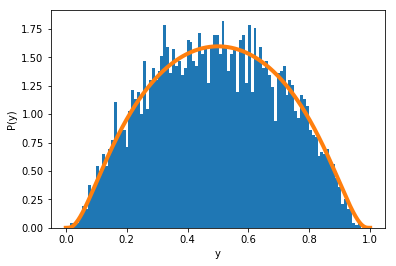

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plot.basic_plot

# Plot the probability distribution for y = F(x) 
# where F(x) is the logistic function and x ~ N(0,1)

# Probability density of x
def Px(x):
    return (1./np.sqrt(2.*np.pi)) * np.exp(-x**2 / 2.)

# Nonlinear function
def F(x):
    return 1. / (1. + np.exp(-x))

# Inverse of nonlinear function
def F_inv(x):
    return np.log(x / (1. - x))

# Probability density of y
def Py(y):
    # Determinant of Jacobian of F^{-1}(y) 
    Jy = (1. / y) + (1. / (1. - y))
    return Jy*Px(F_inv(y))

# Randomly sample from the distribution and plot a histogram 
x = np.random.randn(5000)
plt.hist(F(x), bins = 100, density = True)
# Plot the distribution computed analytically
y = np.linspace(1e-16, 1.0-1e-16, 1000)
plt.plot(y, Py(y))

plt.xlabel('y')
plt.ylabel('P(y)')

plt.show()


## Expected Values using the Law of the unconscious statistician

Using the definition above is cumbersome and rarely practical for complicated nonlinear transformations. Typically, we are more interested in computing certain statistics of the random variable $\pmb{y}$, such as its mean and covariance. Enter the law of the unconscious statistician. 

As before, suppose that $\pmb{x}$ is a Gaussian random variable. We can compute the expected value of $\pmb{y} = \mathcal{F}(\pmb{x})$ denoted $E[\pmb{y}]$ without explicitely knowing its associated probability density function as follows:

\begin{equation}
\label{eq:gwint}
E[\pmb{y}] = \int \mathcal{F}(\pmb{x}) N(\pmb{x} | \pmb{x_0}, P_x) d \pmb{x}
\end{equation}

In other words, $E[\pmb{y}]$ can be computed as a Gaussian weighted integral. Let's return to our logistic function example $y = \mathcal{F}(x) = \frac{1}{1 + e^{-x}}$ and compute the expected value of $y$ using random sampling and numerical integration. 

In [14]:
from scipy.integrate import quad

# Estimate expected value of y by random sampling
y_mean1 = F(x).mean()

# Estimate expected value of y using the law of the unconscious
#statistician, 
y_mean2 = quad(lambda x : F(x)*Px(x), -6., 6.)[0]

print("Random sampling estimate: {}".format(y_mean1))
print("Integral estimate: {}".format(y_mean2))

Random sampling estimate: 0.4930209985016708
Integral estimate: 0.49999999901341236


Covariance is also defined in terms of expected values:
\begin{equation}
\text{Cov}[\pmb{y}] = E[(\mathcal{F}(\pmb{x}) - E[\mathcal{F}(\pmb{x})])(\mathcal{F}(\pmb{x}) - E[\mathcal{F}(\pmb{x})])^T]
\end{equation}
Given the importance of these types of expected value integrals, considerable effort has gone into efficiently estimating Gaussian weighted integrals of the form shown in Equation \ref{eq:gwint}. For a simple 1D problem, a basic quadrature rule suffices. In the next section, we will discuss how standard quadrature rules rapidly become computationally intractable as dimensionality of the problem grows. Then we will show some alternative methods for computing Gaussian weighted integrals including the Unscented Transform. 